# Life Expectancy in the World - Data Analysis

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import pycountry_convert as pc

sns.set_theme(style="whitegrid")
df = pd.read_csv('data/LifeExpectancy.csv')
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Adjusting Dataset

In [229]:
df['Country'] = df['Country'].str.replace(r"\s*\(.*?\)", "", regex=True)
replace_dict = {'Republic of Korea': 'South Korea', 
               'The former Yugoslav republic of Macedonia': 'North Macedonia'}
df['Country'] = df['Country'].replace(replace_dict)

# Add continent
def get_continent(country_name):
    try:
        if country_name == "Timor-Leste":
            return "Asia"
        # Convert country name to alpha-2 ISO code
        country_code = pc.country_name_to_country_alpha2(country_name)
        # Get continent code from alpha-2 code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        # Map continent code to continent name
        continent_map = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'SA': 'South America',
            'OC': 'Oceania',
            'AN': 'Antarctica'
        }
        return continent_map.get(continent_code, 'Unknown')
    except KeyError:
        return 'Unknown'

# Apply the function to add a new column
df['Continent'] = df['Country'].apply(get_continent)

## Features over time

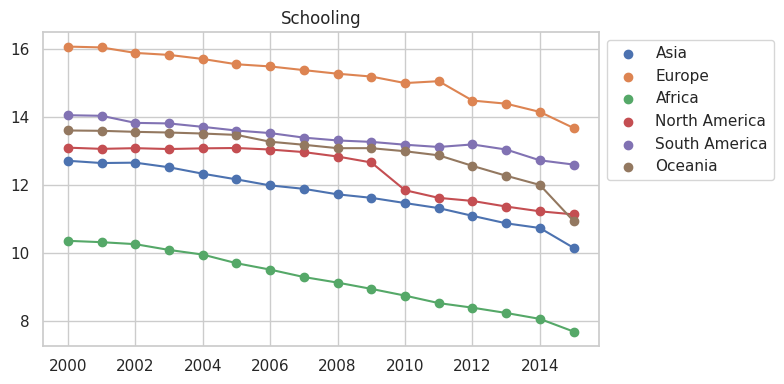

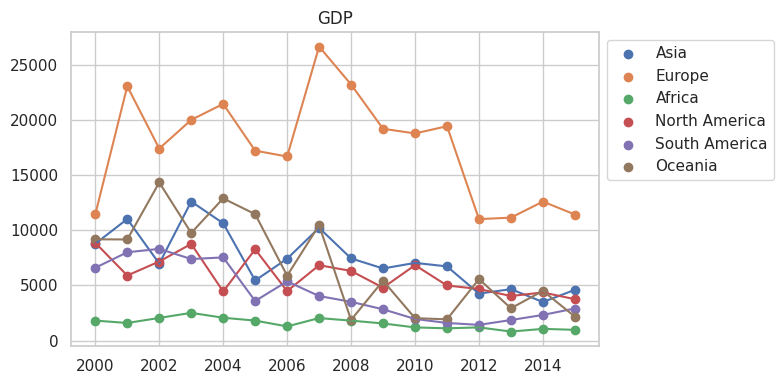

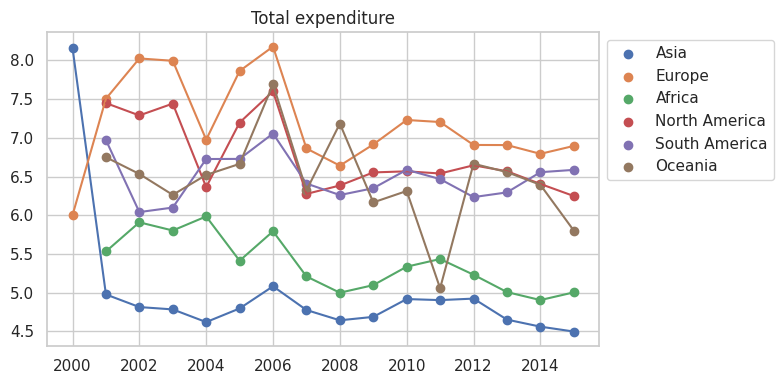

In [280]:
def get_data_per_continent_year(df, param):
    data = []
    years = df['Year'].unique()
    for c in df['Continent'].unique():
        continent_data = df[df['Continent']==c]
        plt.plot(years, continent_data.groupby('Year')[param].mean())
        plt.scatter(years, continent_data.groupby('Year')[param].mean(), label=c)

# change param to visualize other data
param = ['Schooling', 'GDP', 'Total expenditure'] 

for p in param:
    plt.figure(figsize=(8,4))
    continents = get_data_per_continent_year(df, p)
    plt.title(p)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

## Pie Charts - Population, Infant Deaths, Measles

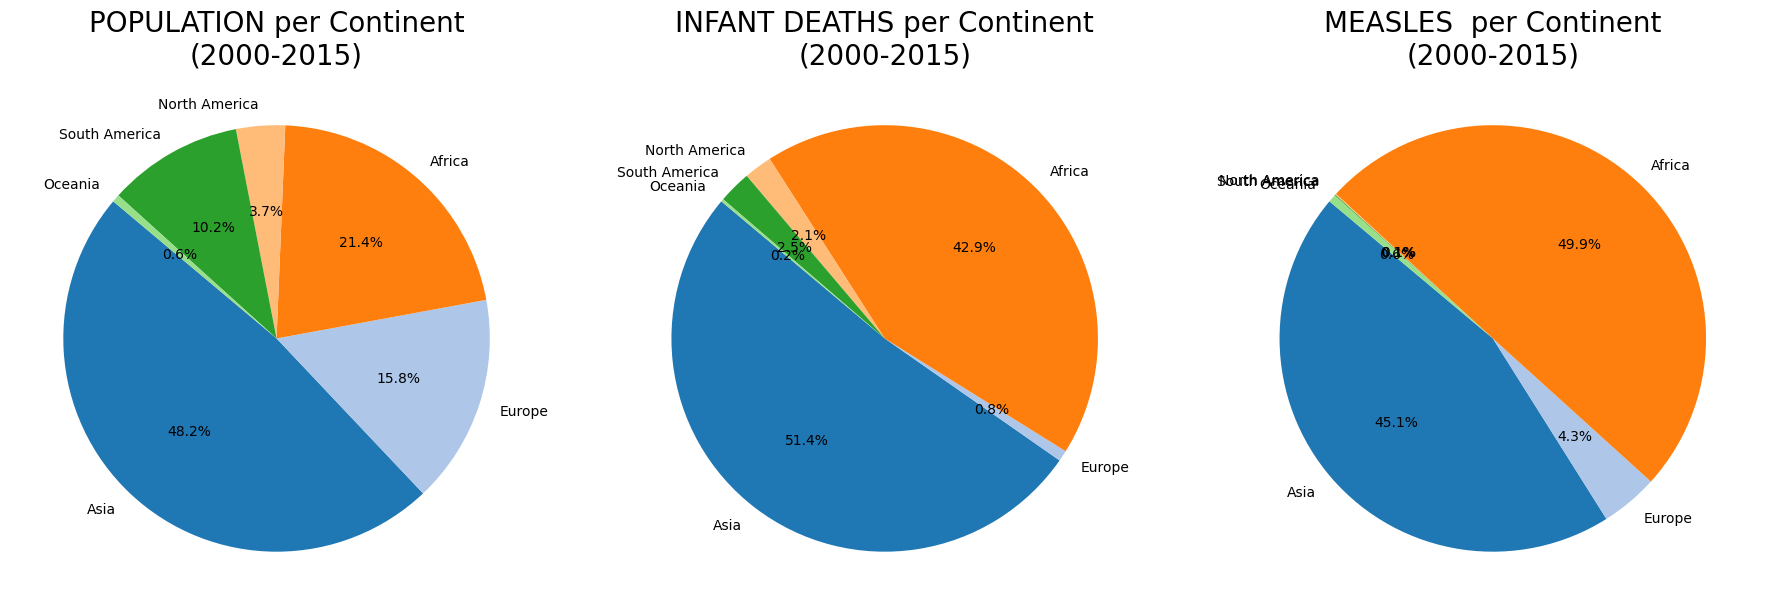

In [183]:
start_year = df['Year'].unique().min()
end_year = df['Year'].unique().max()

def get_data_per_continent(df, param):
    data = []
    for c in df['Continent'].unique():
        continent_data = df[df['Continent']==c][param]
        data.append(continent_data.sum())
    return data

params = [ 'Population', 'infant deaths', 'Measles ']

param0 = get_data_per_continent(df, params[0])
param1 = get_data_per_continent(df, params[1])
param2 = get_data_per_continent(df, params[2])

# Set up subplots for 3 pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of parameter data for the plots
param_data = [param0, param1, param2]

# Create pie charts
for i, ax in enumerate(axes):
    ax.pie(param_data[i], labels=df['Continent'].unique(), autopct='%1.1f%%', 
           startangle=140, colors=plt.cm.tab20.colors)
    ax.set_title(f'{params[i].upper()} per Continent\n({start_year}-{end_year})', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

## Visualize Data on World Map

In [176]:
# Create a base map
def make_map(data, column):
    m = folium.Map(location=[0, 0], zoom_start=2)
    
    # Add the choropleth layer
    folium.Choropleth(
        geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json',  # GeoJSON file
        name='choropleth',
        data=data,
        columns=['Country', column],
        key_on='feature.properties.name',  # Match GeoJSON properties to your 'country' column
        fill_color='YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_color="lightgrey"
    ).add_to(m)
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    # Save or display the map
    m.save('life_expectancy_map.html')
    return m

## Life Expectancy per Country

In [177]:
make_map(df, 'Life expectancy')